# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [100]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [101]:
# Set the API base URL
url="http://api.openweathermap.org/data/2.5/weather?units=Metric&"
# url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity=city_weather["main"]["humidity"]
        city_clouds=city_weather["clouds"]['all']
        city_wind=city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        city_date=city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | libreville
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | turiacu
Processing Record 7 of Set 1 | rio grande
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | taoudenni
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | san luis de la loma
Processing Record 12 of Set 1 | keflavik
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | laojunmiao
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | new kingman-butler
Processing Record 19 of Set 1 | altpinar
Processing Record 20 of Set 1 | nadym
Processing Record 21 of Set 1 | sisimiut
Processing Record 22 of Set 1 | edinburgh of the seven s

In [102]:
# Convert the cities weather data into a Pandas DataFrame    
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,6.45,87,44,5.46,SJ,1687818191
1,adamstown,-25.0660,-130.1015,21.52,79,2,4.87,PN,1687818191
2,libreville,0.3925,9.4537,27.01,74,40,4.12,GA,1687818191
3,stanley,54.8680,-1.6985,13.49,83,0,2.57,GB,1687818191
4,bethel,41.3712,-73.4140,24.45,84,75,4.12,US,1687818191
...,...,...,...,...,...,...,...,...,...
561,mossel bay,-34.1831,22.1460,12.96,90,87,10.77,ZA,1687818287
562,lerwick,60.1545,-1.1494,13.00,92,66,4.33,GB,1687818288
563,dowlatabad,32.7998,51.6955,25.82,21,0,0.00,IR,1687818288
564,fortaleza,-3.7227,-38.5247,27.34,78,75,4.12,BR,1687818103


In [103]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,6.45,87,44,5.46,SJ,1687818191
1,adamstown,-25.0660,-130.1015,21.52,79,2,4.87,PN,1687818191
2,libreville,0.3925,9.4537,27.01,74,40,4.12,GA,1687818191
3,stanley,54.8680,-1.6985,13.49,83,0,2.57,GB,1687818191
4,bethel,41.3712,-73.4140,24.45,84,75,4.12,US,1687818191


In [104]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/henry/Desktop/python-api-challenge/cities.csv", index_label="City_ID")

In [105]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/henry/Desktop/python-api-challenge/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,6.45,87,44,5.46,SJ,1687818191
1,adamstown,-25.0660,-130.1015,21.52,79,2,4.87,PN,1687818191
2,libreville,0.3925,9.4537,27.01,74,40,4.12,GA,1687818191
3,stanley,54.8680,-1.6985,13.49,83,0,2.57,GB,1687818191
4,bethel,41.3712,-73.4140,24.45,84,75,4.12,US,1687818191


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

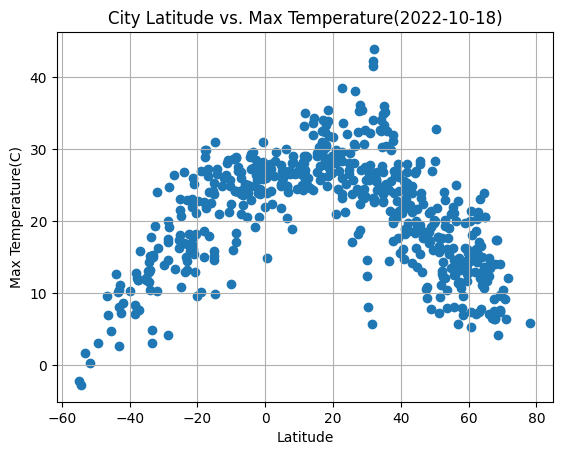

In [106]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Latitude vs. Max Temperature(2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("C:/Users/henry/Desktop/python-api-challenge/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

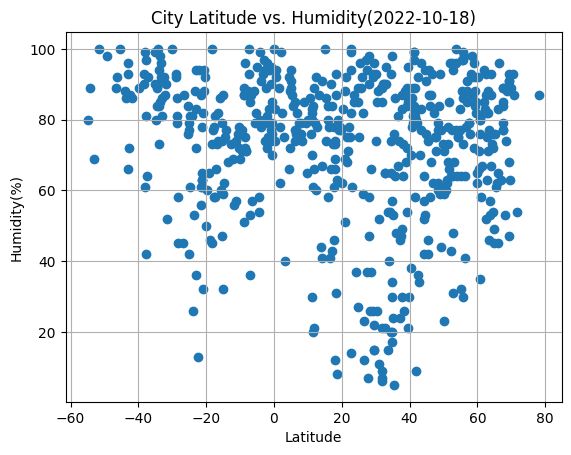

In [107]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("City Latitude vs. Humidity(2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("C:/Users/henry/Desktop/python-api-challenge/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

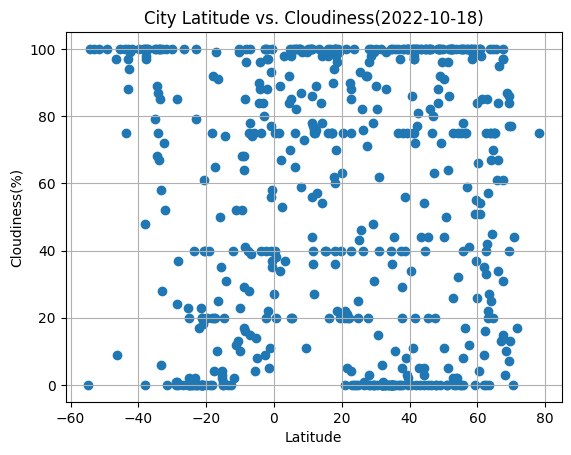

In [108]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("City Latitude vs. Cloudiness(2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("C:/Users/henry/Desktop/python-api-challenge/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

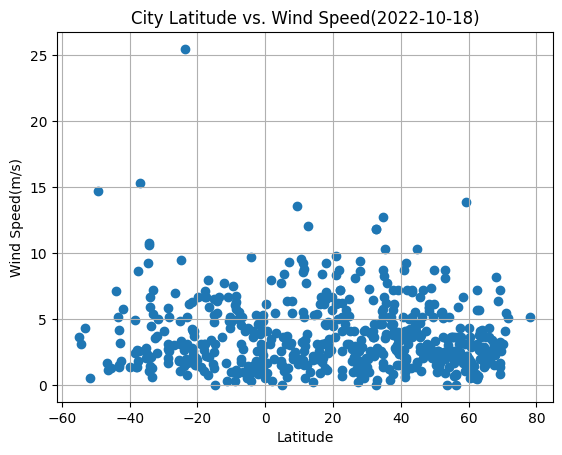

In [109]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title("City Latitude vs. Wind Speed(2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("C:/Users/henry/Desktop/python-api-challenge/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [110]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
   
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    print(f"The r-value is: {rvalue**2}")

    regress_values = x_values * slope + intercept
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.title(title)

    plt.show()


In [111]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,6.45,87,44,5.46,SJ,1687818191
2,libreville,0.3925,9.4537,27.01,74,40,4.12,GA,1687818191
3,stanley,54.8680,-1.6985,13.49,83,0,2.57,GB,1687818191
4,bethel,41.3712,-73.4140,24.45,84,75,4.12,US,1687818191
7,albany,42.6001,-73.9662,22.16,92,100,4.23,US,1687818192


In [112]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,21.52,79,2,4.87,PN,1687818191
5,turiacu,-1.6633,-45.3717,23.69,94,22,1.74,BR,1687818192
6,rio grande,-32.0350,-52.0986,24.06,87,52,3.70,BR,1687818192
9,puerto natales,-51.7236,-72.4875,0.25,100,100,0.51,CL,1687818192
12,port alfred,-33.5906,26.8910,15.10,85,100,4.47,ZA,1687818193


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.501051935397052


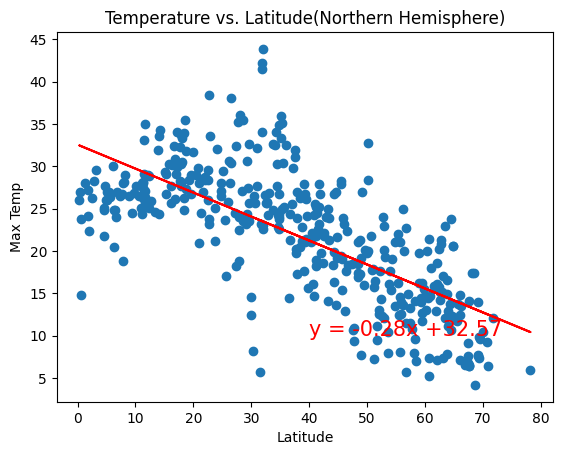

In [113]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel('Max Temp')
plot_linear_regression(x_values, y_values,"Temperature vs. Latitude(Northern Hemisphere)",(40,10))


The r-value is: 0.6627556109967437


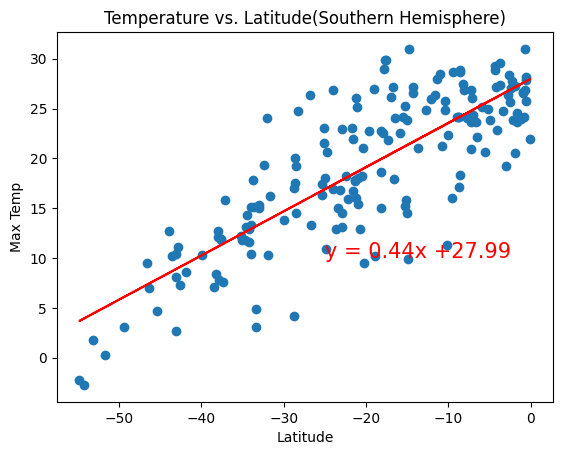

In [114]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel('Max Temp')
plot_linear_regression(x_values, y_values,"Temperature vs. Latitude(Southern Hemisphere)",(-25,10))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002782391361249096


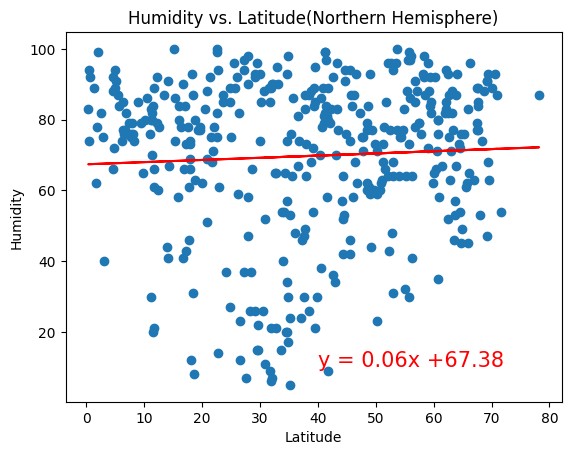

In [115]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel('Humidity')
plot_linear_regression(x_values, y_values,"Humidity vs. Latitude(Northern Hemisphere)",(40,10))

The r-value is: 0.015273396034667


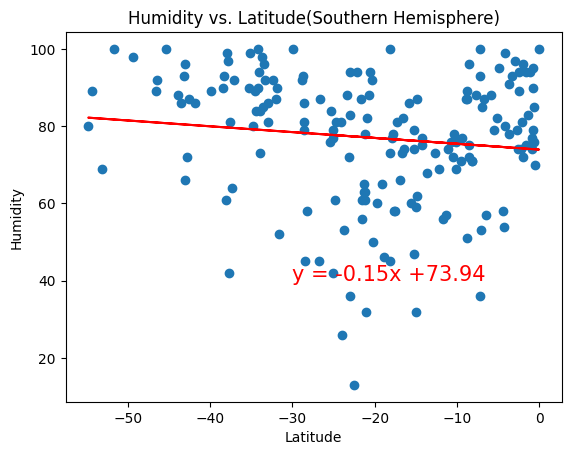

In [116]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylabel('Humidity')
plot_linear_regression(x_values, y_values,"Humidity vs. Latitude(Southern Hemisphere)",(-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.006613221986319831


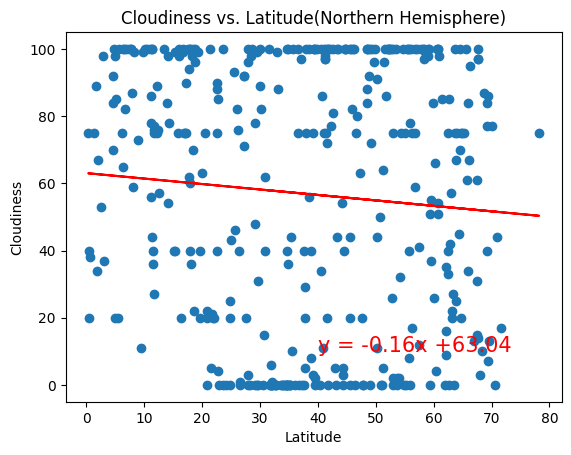

In [117]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.ylabel('Cloudiness')
plot_linear_regression(x_values, y_values,"Cloudiness vs. Latitude(Northern Hemisphere)",(40,10))


The r-value is: 0.0408427472092976


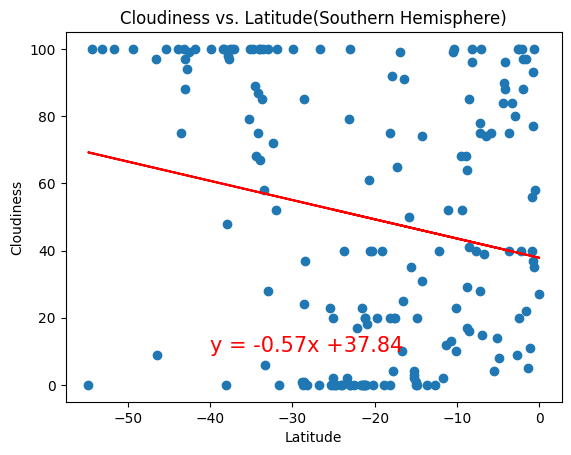

In [118]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.ylabel('Cloudiness')
plot_linear_regression(x_values, y_values,"Cloudiness vs. Latitude(Southern Hemisphere)",(-40,10))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.015102623929871828


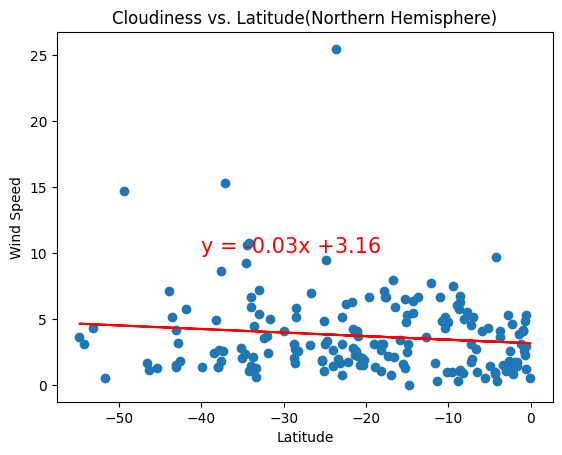

In [119]:
# Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.ylabel('Wind Speed')
plot_linear_regression(x_values, y_values,"Cloudiness vs. Latitude(Northern Hemisphere)",(-40,10))

The r-value is: 0.023526700973057122


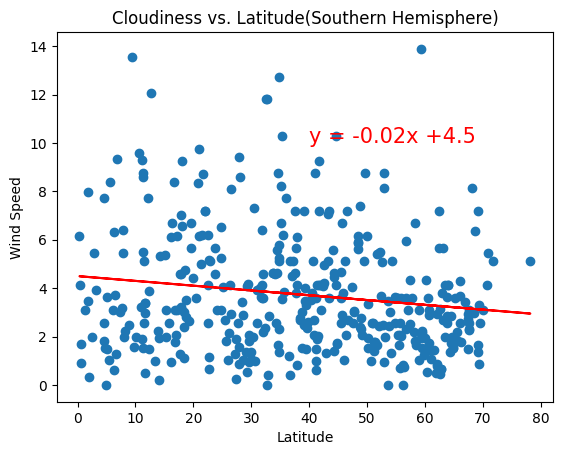

In [120]:
# Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.ylabel('Wind Speed')
plot_linear_regression(x_values, y_values,"Cloudiness vs. Latitude(Southern Hemisphere)",(40,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE